<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW#3 - 2329031 정윤주**
## **Problem 1. Short Question**

**(a) 아래는 Neural Network의 학습 절차에 대한 그림이다. 이 그림을 토대로 Neural Network의 학습 절차에 대해 설명하시오.**

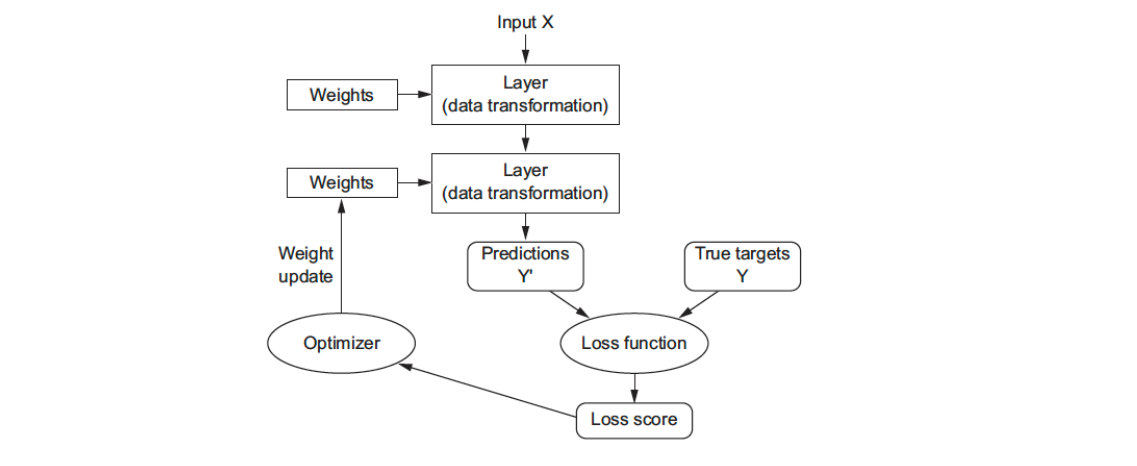

배치 사이즈만큼의 훈련 샘플(x,y)를 가져와 입력층에 데이터 x를 입력한다. 이후, 전체 네트워크를 따라 weight를 곱하고 활성함수를 거쳐 입력 데이터를 변환하고 출력값 $\hat{y}$를 계산한다. 출력된 $\hat{y}$와 실제 $y$값의 오차를 사용해 현재 배치 안에서 평균 Loss를 계산한다. 회귀 문제의 경우 MSE, 분류 문제의 경우 Cross Entropy를 이용한다. 이후 출력층부터 입력층까지 역방향으로 되돌아가며 가중치 파라미터에 대한 Loss의 그래디언트를 계산하고, Loss가 줄어드는 방향으로 가중치를 업데이트 한다. 다음 배치 사이즈만큼의 훈련 샘플을 가져와 반복한다.

**(b) 딥러닝 모델에서 자주 사용하는 활성화 함수 3가지의 이름과 함수를 그린 다음 각 함수의 특징에 대해 서술하시오**

대표적인 활성화 함수로는 Sigmoid, ReLU, tanh 함수가 있다.
Sigmoid 함수의 경우 S자 형태로 나타나며, 항상 0과 1 사이의 값으로 출력되며 주로 이진 분류 문제의 출력층에서 자주 사용된다.

ReLU의 경우 연속적이지만 z=0에서 미분가능하지 않아 기울기가 갑자기 변해 경사 하강법이 엉뚱한 곳으로 튈 수도 있다. z<0인 경우 도함수는 0이지만 실제로 잘 작동하고 계산속도가 빠르다는 장점이 있다.

tanh의 경우 sigmoid와 같이 S자 모양이며 연속적이며 미분 가능하다. 출력범위는 -1과 1 사이로 이 범위는 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있어 빠르게 수렴되도록 도와준다.

**(c) 스팸 메일을 분류하기 위해서는 출력층에 몇 개의 뉴런이 필요하며, 출력층에 어떤 활성화 함수를 사용해야 하는가?**

스팸 메일 분류는 이진 분류 문제이기 때문에 **출력층의 뉴런 수는 1개**이다. 마찬가지로 이진 분류 문제이기 때문에 출력층에는 **Sigmoid 함수**를 사용한다.

**(d)  dimension이 (100, 10)인 데이터(target column 포함)를 이용하여 딥러닝 모델을 정의하고자
한다. 모델의 input layer를 정의할 때, 뉴런의 개수는 몇개여야 하는가?**

데이터의 피처의 개수가 10개이고 그 중 하나는 target이므로 입력층의 뉴런의 개수는 **10-1 = 9개**이다.

**(e) 배치 사이즈(batch size)와 에포크(epoch)의 차이에 대해서 서술하시오.**

batch size는 데이터를 몇 개씩 묶어 학습할지 결정하며 한 번에 학습하는 샘플 수를 의미하고, Epoch의 경우 전체 데이터 셋을 몇 번 학습할지에 대해 결정한다.

**(f)  다음은 tensorflow 팀에서 만든 신경망 시뮬레이터이다. 모델 구조와 하이퍼파라미터를
조작하여 신경망에 대해 이해해보시오.**

http://playground.tensorflow.org

Learning rate를 변화했을 때, 너무 작게 설정하면 학습속도가 매우 느리고, 너무 크게 설정하면 모델이 학습을 하지 못하고 결정 경계가 제대로 나타나지 않았다.

Activation Function의 경우 ReLU에서는 빠르게 수렴하고 복잡한 결정 경계가 생성되었다. Tanh에서는 부드러운 경계가 형성되었지만, ReLU보다 학습속도가 느리게 나타났다. Sigmoid의 경우 경계가 매우 부드럽게 나타났다.

Hidden layer의 수를 변화시켰을 때 layer의 수가 너무 적으면 단순한 경계만 학습이 가능했고, 4개 이상일 때는 복잡한 경계도 학습 가능하되, 과적합의 가능성이 높아졌다.

## **Problem 2. Regression**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
bike = pd.read_csv('regression_data.csv')
bike.head(3)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


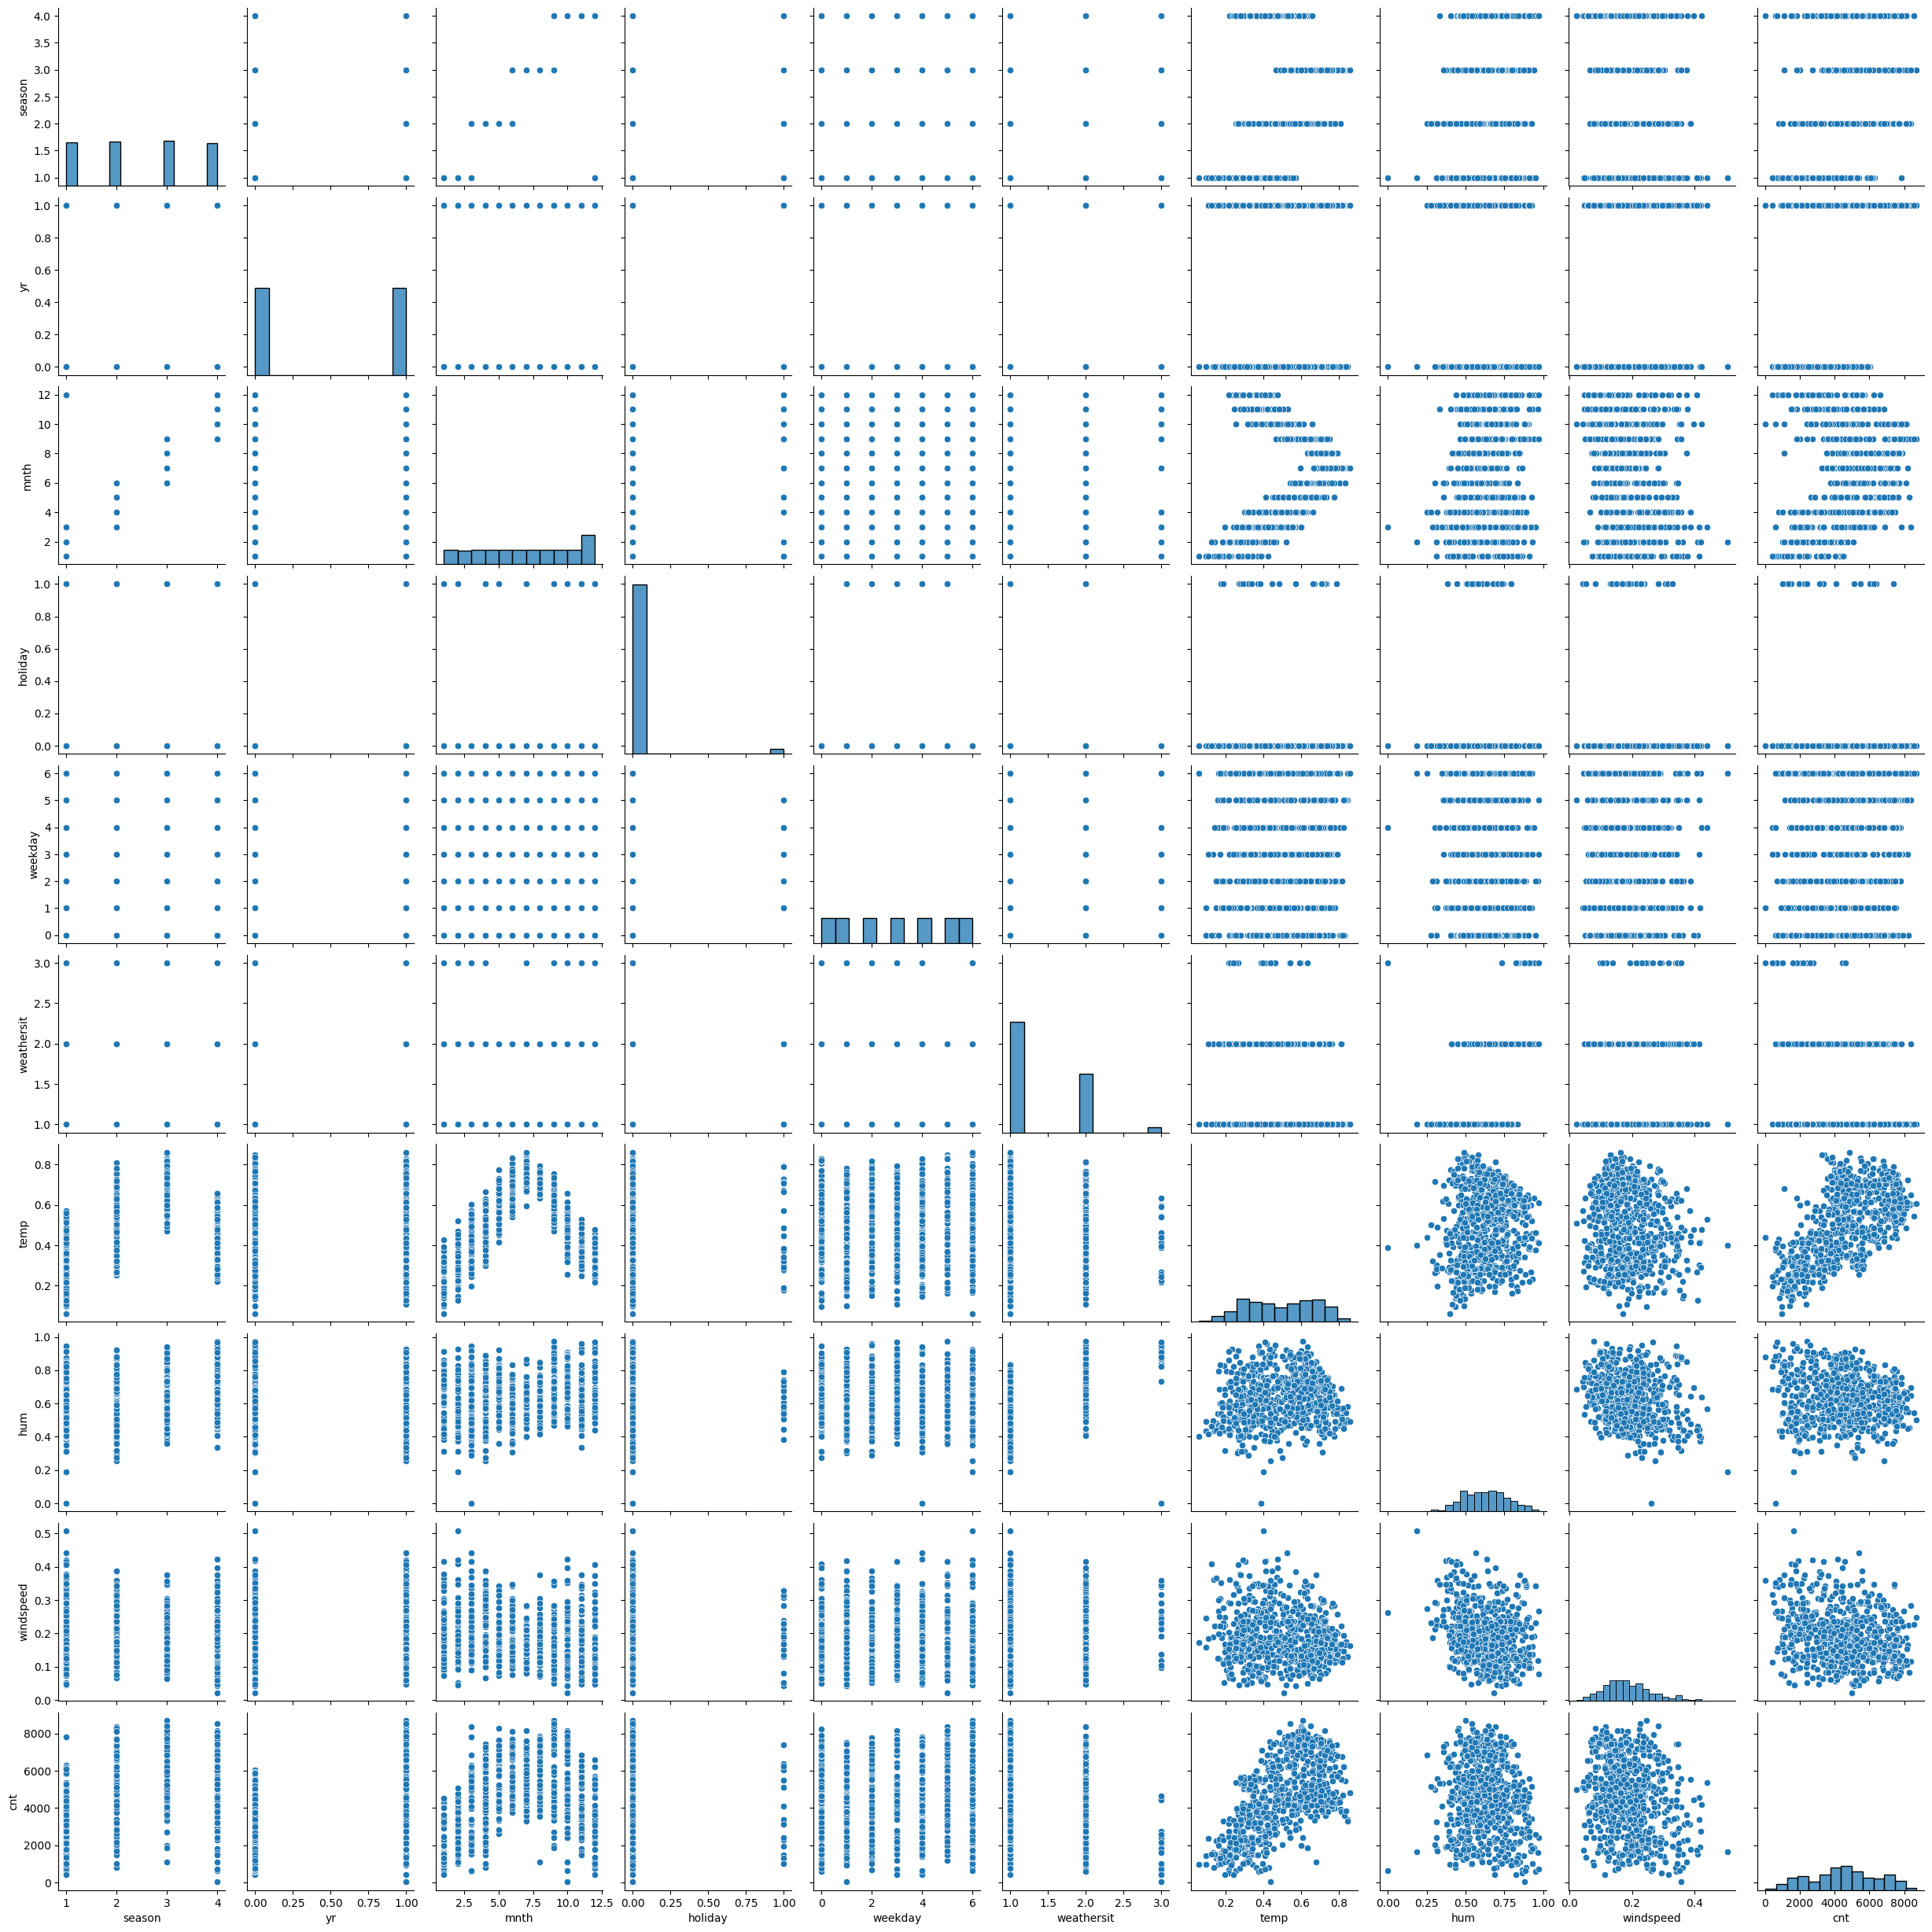

In [4]:
sns.pairplot(data=bike)
plt.show()

**(a) 데이터를 불러온 후 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.**

In [13]:
bike_encoded = pd.get_dummies(bike, columns=['yr','season', 'mnth', 'holiday', 'weekday', 'weathersit']).astype(int)

In [14]:
bike_encoded.head(3)

,temp,hum,windspeed,cnt,yr_0,yr_1,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,985,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,801,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1349,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


**(b) 데이터를 x(feature), y(target)로 분리하시오.**

In [60]:
X = bike_encoded.drop(columns=['cnt'])
y = bike_encoded['cnt'].astype('float32')

**(c) 데이터를 train/test data로 split 하시오. (train:test = 3:1, random seed = 777) 다음으로 numeric feature에 대하여 standardization을 적용하여 feature scaling을 하시오.**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=777)

In [63]:
scaler = StandardScaler()

numeric_feature = ['temp', 'hum', 'windspeed']
X_train[numeric_feature] = scaler.fit_transform(X_train[numeric_feature])
X_test[numeric_feature] = scaler.transform(X_test[numeric_feature])

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
(모델에 대한 코드를 반드시 첨부할 것.**

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 24780840.0000 - val_loss: 21919500.0000
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24456726.0000 - val_loss: 21893552.0000
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24841228.0000 - val_loss: 21818302.0000
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24402876.0000 - val_loss: 21611716.0000
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24621628.0000 - val_loss: 21109130.0000
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22963652.0000 - val_loss: 20070232.0000
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22023698.0000 - val_loss: 18191786.0000
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19034754.0000 - val_loss: 15267256.0000
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16517565.0000 - val_loss: 11397439.0000
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11781847.0000 - val_loss: 7386919.0000
Epoch 1

In [67]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
])
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 24568906.0000 - val_loss: 21919828.0000
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25184484.0000 - val_loss: 21894684.0000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24964360.0000 - val_loss: 21823814.0000
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23954504.0000 - val_loss: 21640750.0000
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23365312.0000 - val_loss: 21225718.0000
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25179796.0000 - val_loss: 20390382.0000
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22282714.0000 - val_loss: 18912044.0000
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19330966.0000 - val_loss: 16584774.0000
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17790296.0000 - val_loss: 13355530.0000
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14802481.0000 - val_loss: 9569003.0000
Ep

In [74]:
model3 = Sequential([
    Dense(32, activation='relu', input_shape=(33,)),
    Dense(16, activation='relu'),
     Dense(1, activation='linear')
])
model3.compile(optimizer=Adam(learning_rate=0.005), loss='mse')
model3.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 23842584.0000 - val_loss: 24529794.0000
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23334744.0000 - val_loss: 23332030.0000
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21241974.0000 - val_loss: 19127256.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16243663.0000 - val_loss: 11409328.0000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8773379.0000 - val_loss: 4681787.5000
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4057996.2500 - val_loss: 2682791.2500
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2671701.5000 - val_loss: 2179347.5000
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2260439.2500 - val_loss: 1808818.0000
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1960265.3750 - val_loss: 1545379.3750
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1557701.5000 - val_loss: 1327368.0000
Epoch 11/200
35/35 ━

In [69]:
model4 = Sequential([
    Dense(256, activation='relu', input_shape=(33,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model4.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 23362080.0000 - val_loss: 24637502.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23050826.0000 - val_loss: 24581658.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24148718.0000 - val_loss: 24388954.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23799452.0000 - val_loss: 23831350.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23088882.0000 - val_loss: 22505180.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21050600.0000 - val_loss: 19877712.0000
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18548872.0000 - val_loss: 15645332.0000
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14089149.0000 - val_loss: 10322051.0000
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8710237.0000 - val_loss: 5593477.0000
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4626094.5000 - val_loss: 3286583.2500
Epoch 11/100

In [70]:
model5 = Sequential([
    Dense(128, activation='tanh', input_shape=(33,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model5.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model5.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 23807886.0000 - val_loss: 24631492.0000
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23938968.0000 - val_loss: 24561428.0000
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24126886.0000 - val_loss: 24325072.0000
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23694942.0000 - val_loss: 23710714.0000
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 22610320.0000 - val_loss: 22466276.0000
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20262954.0000 - val_loss: 20431418.0000
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19207578.0000 - val_loss: 17603010.0000
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15959621.0000 - val_loss: 14263949.0000
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 12793900.0000 - val_loss: 10794766.0000
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9113242.0000 - val_loss: 7711178.0000
Epo

**(e)$R^2$를 이용하여 모델의 성능을 판단하고, 어떤 모델의 성능이 가장 좋은지 서술하시오.**

In [78]:
from sklearn.metrics import r2_score

y_pred1 = model.predict(X_test)
print('model1: {:.4f}'.format(r2_score(y_test, y_pred1)))

y_pred2 = model2.predict(X_test)
print('model2: {:.4f}'.format(r2_score(y_test, y_pred2)))

y_pred3 = model3.predict(X_test)
print('model3: {:.4f}'.format(r2_score(y_test, y_pred3)))

y_pred4 = model4.predict(X_test)
print('model4: {:.4f}'.format(r2_score(y_test, y_pred4)))

y_pred5 = model5.predict(X_test)
print('model5: {:.4f}'.format(r2_score(y_test, y_pred5)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model1: 0.8001
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
model2: 0.7949
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
model3: 0.8061
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
model4: 0.7937
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
model5: 0.8097


In [77]:
print(model5.summary())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,165 (172.52 KB)

 Trainable params: 14,721 (57.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,444 (115.02 KB)

None


$R^2$ 를 기준으로 계산했을 때 model5의 성능이 가장 뛰어난 것을 확인할 수 있다.

## **Problem3. Classification**

**(a) 데이터를 불러온 후 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.**

In [89]:
bank = pd.read_csv('classification_data.csv', sep=";")

In [90]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank = pd.get_dummies(bank, columns=['job','marital', 'education',
                                     'default', 'housing', 'loan', 'contact','month', 'poutcome'], dtype=int)
bank['y'] = encoder.fit_transform(bank['y'])

**(b) 데이터를 x(feature), y(target)로 분리하시오.**

In [94]:
X = bank.drop(columns=['y'])
y = bank['y']

**(c) 데이터를 train/test data로 split 하시오. (train:test = 3:1, random seed = 777) 다음으로 numeric
feature에 대하여 standardization을 적용하여 feature scaling을 하시오.**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=777)

In [96]:
numeric_feature = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()
X_train[numeric_feature] = scaler.fit_transform(X_train[numeric_feature])
X_test[numeric_feature] = scaler.transform(X_test[numeric_feature])

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사
용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
(모델에 대한 코드를 반드시 첨부할 것.)**

In [97]:
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score

In [98]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6844 - loss: 20.8296 - val_accuracy: 0.8894 - val_loss: 1.7498
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 1.5185 - val_accuracy: 0.8274 - val_loss: 0.5030
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8360 - loss: 1.4228 - val_accuracy: 0.7891 - val_loss: 0.5913
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8452 - loss: 0.9475 - val_accuracy: 0.8968 - val_loss: 0.8850
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8519 - loss: 1.2418 - val_accuracy: 0.8761 - val_loss: 1.3850
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 1.1925 - val_accuracy: 0.7006 - val_loss: 1.1292
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 1.3154 - val_accuracy: 0.8909 - val_loss: 0.8836
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 1.0318 - val_accuracy: 0.8894 - val_los

In [99]:
model2 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.2)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8102 - loss: 0.4981 - val_accuracy: 0.8348 - val_loss: 0.4013
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8644 - loss: 0.3700 - val_accuracy: 0.8835 - val_loss: 0.3659
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8828 - loss: 0.3391 - val_accuracy: 0.8850 - val_loss: 0.3400
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8889 - loss: 0.3169 - val_accuracy: 0.8879 - val_loss: 0.3094
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8960 - loss: 0.3014 - val_accuracy: 0.8894 - val_loss: 0.3482
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8808 - loss: 0.3327 - val_accuracy: 0.8864 - val_loss: 0.3000
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8924 - loss: 0.2877 - val_accuracy: 0.8923 - val_loss: 0.3132
Epoch 8/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8778 - loss: 0.3244 - val_accuracy: 0.8909 - val_

In [100]:
model3 = Sequential([
    Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer=Adam(0.005), loss='binary_crossentropy', metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8744 - loss: 0.3919 - val_accuracy: 0.8894 - val_loss: 0.3449
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8873 - loss: 0.3478 - val_accuracy: 0.8894 - val_loss: 0.3678
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8770 - loss: 0.3716 - val_accuracy: 0.8894 - val_loss: 0.3413
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8687 - loss: 0.3718 - val_accuracy: 0.8879 - val_loss: 0.3268
Epoch 5/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8741 - loss: 0.3575 - val_accuracy: 0.8835 - val_loss: 0.3334
Epoch 6/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8818 - loss: 0.3430 - val_accuracy: 0.8879 - val_loss: 0.3329
Epoch 7/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8754 - loss: 0.3593 - val_accuracy: 0.8909 - val_loss: 0.3193
Epoch 8/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8871 - loss: 0.3259 - val_accuracy: 0.8909 - val_loss

In [101]:
model4 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model4.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

model4.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8016 - loss: 15.1908 - val_accuracy: 0.8879 - val_loss: 1.2714
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 5.8632 - val_accuracy: 0.8879 - val_loss: 0.4951
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8584 - loss: 1.9618 - val_accuracy: 0.8894 - val_loss: 1.4573
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8579 - loss: 1.4334 - val_accuracy: 0.9071 - val_loss: 0.3175
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8721 - loss: 1.0415 - val_accuracy: 0.8879 - val_loss: 0.6032
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8899 - loss: 0.4689 - val_accuracy: 0.8968 - val_loss: 0.3047
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8930 - loss: 0.3230 - val_accuracy: 0.7596 - val_loss: 0.7613
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8680 - loss: 0.5056 - val_accuracy: 

In [102]:
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model5.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2688 - loss: 1.1411 - val_accuracy: 0.8894 - val_loss: 0.4114
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8781 - loss: 0.4099 - val_accuracy: 0.8894 - val_loss: 0.3679
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3870 - val_accuracy: 0.8894 - val_loss: 0.3555
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8858 - loss: 0.3606 - val_accuracy: 0.8894 - val_loss: 0.3508
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8802 - loss: 0.3663 - val_accuracy: 0.8894 - val_loss: 0.3487
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.3512 - val_accuracy: 0.8879 - val_loss: 0.3475
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8833 - loss: 0.3591 - val_accuracy: 0.8864 - val_loss: 0.3474
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.3522 - val_accuracy: 0.8879 - val_loss:

**(e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은가?**

In [103]:
from sklearn.metrics import confusion_matrix

In [108]:
y_pred1 = model1.predict(X_test)
y_pred1_bin = (y_pred1 > 0.5).astype(int)  # 0.5 임계값 적용
print('model1:\n', confusion_matrix(y_test, y_pred1_bin))
print("Accuracy:", accuracy_score(y_test, y_pred1_bin))

y_pred2 = model2.predict(X_test)
y_pred2_bin = (y_pred2 > 0.5).astype(int)  # 0.5 임계값 적용
print('model2:\n', confusion_matrix(y_test, y_pred2_bin))
print("Accuracy:", accuracy_score(y_test, y_pred2_bin))

y_pred3 = model3.predict(X_test)
y_pred3_bin = (y_pred3 > 0.5).astype(int)  # 0.5 임계값 적용

print('model3:\n', confusion_matrix(y_test, y_pred3_bin))
print("Accuracy:", accuracy_score(y_test, y_pred3_bin))

y_pred4 = model4.predict(X_test)
y_pred4_bin = (y_pred4 > 0.5).astype(int)  # 0.5 임계값 적용

print('model4:\n', confusion_matrix(y_test, y_pred4_bin))
print("Accuracy:", accuracy_score(y_test, y_pred4_bin))

y_pred5 = model5.predict(X_test)
y_pred5_bin = (y_pred5 > 0.5).astype(int)  # 0.5 임계값 적용

print('model5:\n', confusion_matrix(y_test, y_pred5_bin))
print("Accuracy:", accuracy_score(y_test, y_pred5_bin))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
model1:
 [[849 165]
 [ 37  80]]
Accuracy: 0.8213969938107869
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
model2:
 [[1005    9]
 [ 113    4]]
Accuracy: 0.8921308576480991
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
model3:
 [[1004   10]
 [ 109    8]]
Accuracy: 0.8947833775419982
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
model4:
 [[977  37]
 [102  15]]
Accuracy: 0.8770999115826702
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
model5:
 [[1003   11]
 [ 112    5]]
Accuracy: 0.8912466843501327


In [109]:
print(model3.summary())

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                │ (None, 32)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629 (25.90 KB)

 Trainable params: 2,209 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,420 (17.27 KB)

None


accuracy와 confusion matrix를 보았을 때, model3의 성능이 가장 높은 것으로 확인할 수 있다.